# Analyzing the Nutritional Data of the McDonald's Menu 

The following project analyzes and visualizes the nutritional data of the items available on the McDonald's Menu.
<br>
The original dataset was published on Kaggle by McDonald's: <br>
https://www.kaggle.com/mcdonalds/nutrition-facts 


In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("menu.csv")

In [3]:
#Determine the shape of the dataset
data.shape

(260, 24)

In [4]:
#View the first 5 rows
data.head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [5]:
#View the last 5 rows
data.tail(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6
259,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Snack),7.1 oz (202 g),410,150,16.0,25,8.0,38,0.0,...,57,19,1,5,51,10,10,0,30,4


In [6]:
#View a specific list of rows
data.iloc[[123, 125, 200]]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
123,Beverages,Diet Dr Pepper (Medium),21 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,3,0,0,0,0
125,Beverages,Diet Dr Pepper (Child),12 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,1,0,0,0,0
200,Coffee & Tea,Caramel Iced Coffee (Medium),22 fl oz cup,180,60,7.0,11,4.5,22,0.0,...,29,10,0,0,28,1,4,0,4,0


# Exploratory Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [8]:
data.describe(include='all')

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,9,260,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Coffee & Tea,Caramel Latte (Medium),16 fl oz cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,95,1,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,NaN,NaN,NaN,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,NaN,NaN,NaN,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,NaN,NaN,NaN,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000


# Data Cleaning

In [9]:
#Cleaning the Serving Size column
for i in range(260):
    item_list = []
    item_list2 = []
    item = str(data["Serving Size"].iloc[[i]])
    if "(" in item:
        item_list = item.split("(")
        item_list2 = item_list[1].split(" ")
        data["Serving Size"].iloc[[i]] = float(item_list2[0])
    else:
        item_list = item.split(" ")
        data["Serving Size"].iloc[[i]] = float(item_list[0])*29.57

C:\Users\cathe\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [10]:
#Changing the serving size column to float
data["Serving Size"] = data["Serving Size"].astype("float")

In [11]:
#Checking that data type was changed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    float64
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [12]:
#Checking that values have changed
data.iloc[[1, 4, 123, 125, 200, 258, 259]]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
1,Breakfast,Egg White Delight,135.00,250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
4,Breakfast,Sausage McMuffin with Egg Whites,161.00,400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
123,Beverages,Diet Dr Pepper (Medium),3637.11,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,3,0,0,0,0
125,Beverages,Diet Dr Pepper (Child),3696.25,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,1,0,0,0,0
200,Coffee & Tea,Caramel Iced Coffee (Medium),5914.00,180,60,7.0,11,4.5,22,0.0,...,29,10,0,0,28,1,4,0,4,0
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),403.00,810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6
259,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Snack),202.00,410,150,16.0,25,8.0,38,0.0,...,57,19,1,5,51,10,10,0,30,4


# Creating New Columns of Data

In [13]:
#Creating a column for our data set
percent_daily_calories = (data["Calories"]*100)/2000

#Inserting this column at the appropriate position
data.insert(4, "% Recommended Daily Calories", percent_daily_calories)

In [14]:
calories_category = []
for i in range(260):
    calories = int(data["% Recommended Daily Calories"].iloc[[i]])
    if calories <= 25:
        calories_category.append("Low")
    elif calories <= 50:
        calories_category.append("Medium")
    else:
        calories_category.append("High")

#Inserting this column at the appropriate position
data.insert(5, "Calories Category", calories_category)

In [15]:
data.head(5)

,Category,Item,Serving Size,Calories,% Recommended Daily Calories,Calories Category,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,136.0,300,15.0,Low,120,13.0,20,5.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,135.0,250,12.5,Low,70,8.0,12,3.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,111.0,370,18.5,Low,200,23.0,35,8.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,161.0,450,22.5,Low,250,28.0,43,10.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,161.0,400,20.0,Low,210,23.0,35,8.0,...,30,10,4,17,2,21,6,0,25,10


# Determining the Number of Items in Each Menu Category

In [16]:
#Determining the number of instances of each category
data["Category"].value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Beverages             27
Chicken & Fish        27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

# Sorting Values

In [17]:
#Sorting based on Calorie values 
data.sort_values("Calories", ascending = False)

,Category,Item,Serving Size,Calories,% Recommended Daily Calories,Calories Category,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
82,Chicken & Fish,Chicken McNuggets (40 piece),646.00,1880,94.0,High,1060,118.0,182,20.0,...,118,39,6,24,1,87,0,15,8,25
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),434.00,1150,57.5,High,540,60.0,93,20.0,...,116,39,7,28,17,36,15,2,30,40
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),420.00,1090,54.5,High,510,56.0,87,19.0,...,111,37,6,23,17,36,15,2,25,40
34,Breakfast,Big Breakfast with Hotcakes and Egg Whites (La...,437.00,1050,52.5,High,450,50.0,77,16.0,...,115,38,7,28,18,35,4,2,25,30
33,Breakfast,Big Breakfast with Hotcakes and Egg Whites (Re...,423.00,990,49.5,Medium,410,46.0,70,16.0,...,110,37,6,23,17,35,0,2,25,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Beverages,Diet Coke (Child),3459.69,0,0.0,Low,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
116,Beverages,Diet Coke (Large),3430.12,0,0.0,Low,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
115,Beverages,Diet Coke (Medium),3400.55,0,0.0,Low,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
114,Beverages,Diet Coke (Small),3370.98,0,0.0,Low,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Sorting based on % of recommended daily Calories values 
data.sort_values("% Recommended Daily Calories", ascending = False)

,Category,Item,Serving Size,Calories,% Recommended Daily Calories,Calories Category,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
82,Chicken & Fish,Chicken McNuggets (40 piece),646.00,1880,94.0,High,1060,118.0,182,20.0,...,118,39,6,24,1,87,0,15,8,25
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),434.00,1150,57.5,High,540,60.0,93,20.0,...,116,39,7,28,17,36,15,2,30,40
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),420.00,1090,54.5,High,510,56.0,87,19.0,...,111,37,6,23,17,36,15,2,25,40
34,Breakfast,Big Breakfast with Hotcakes and Egg Whites (La...,437.00,1050,52.5,High,450,50.0,77,16.0,...,115,38,7,28,18,35,4,2,25,30
33,Breakfast,Big Breakfast with Hotcakes and Egg Whites (Re...,423.00,990,49.5,Medium,410,46.0,70,16.0,...,110,37,6,23,17,35,0,2,25,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Beverages,Diet Coke (Child),3459.69,0,0.0,Low,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
116,Beverages,Diet Coke (Large),3430.12,0,0.0,Low,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
115,Beverages,Diet Coke (Medium),3400.55,0,0.0,Low,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
114,Beverages,Diet Coke (Small),3370.98,0,0.0,Low,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


# Creating Subset of Breakfast Items

In [19]:
#Creating a subset of all Breakfast items
breakfast_items = data.loc[data["Category"] == "Breakfast"]
#Determining how many breakfast items are available
breakfast_items.shape

(42, 26)

# Creating Subset of Items with 0 Calories

In [20]:
#Creating a subset of items that have 0 Calories
zero_calories = data.loc[data["Calories"]<= 0]
#Determining how many categories contain 0 calories
zero_calories["Category"].value_counts()

Beverages       9
Coffee & Tea    7
Name: Category, dtype: int64

# Coutplots

Based on the plot below, Coffee and Tea is the category with the highest number of items. 

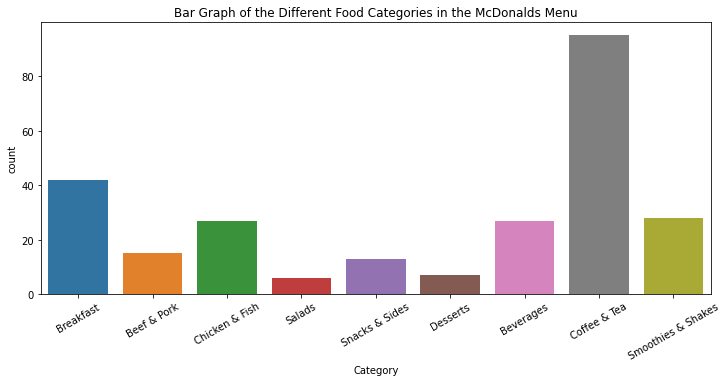

In [21]:
#Plotting a countplot
plt.subplots(figsize=(12, 5))
sns.countplot(x = "Category", data = data)
plt.title("Bar Graph of the Different Food Categories in the McDonalds Menu")
plt.xticks(rotation=30)
plt.show()
plt.close()

Based on the below:
* Coffee and Tea has the most items with a low calorie count
* Salads, Snacks and Sides, Desserts, and Beverages have a low calorie count
* Breakfast and Chicken & Fish are the categories with the highest number of high calorie items

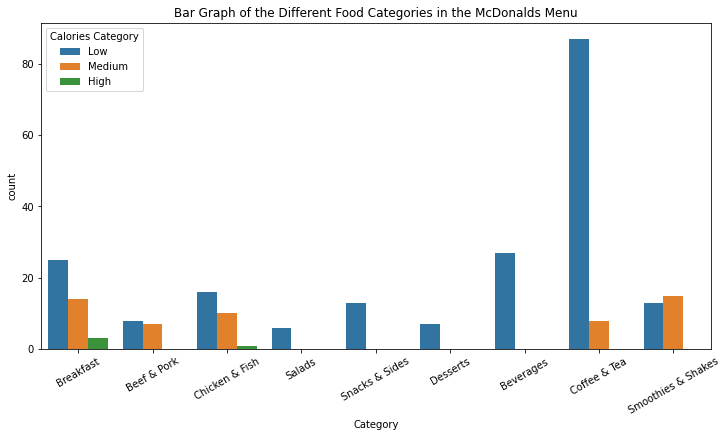

In [22]:
#Plotting a countplot with subcategories
plt.subplots(figsize=(12, 6))
sns.countplot(x = "Category", hue = "Calories Category", data = data)
plt.title("Bar Graph of the Different Food Categories in the McDonalds Menu")
plt.xticks(rotation=30)
plt.show()
plt.close()

# Plotting Bargraphs

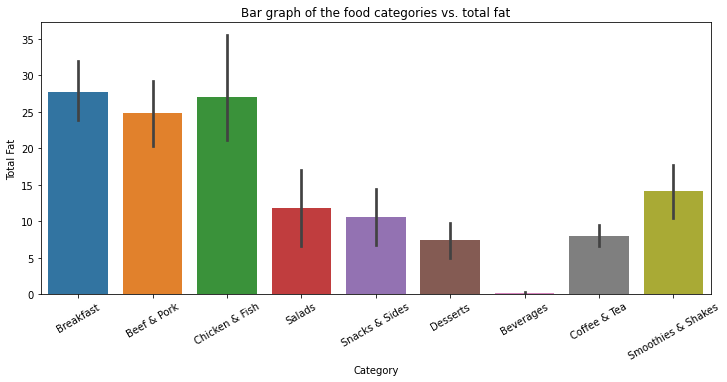

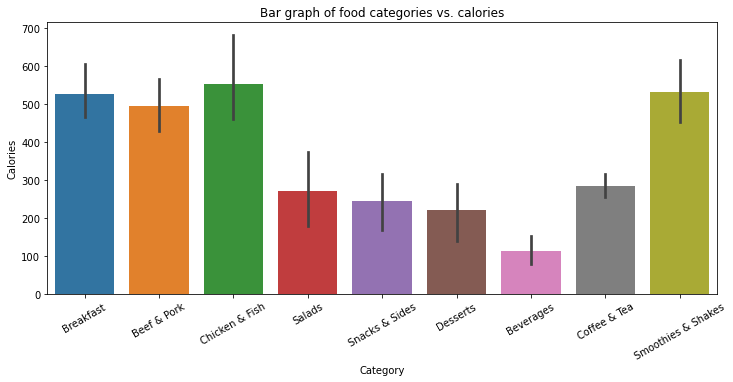

In [23]:
#PLotting a bargraph
plt.subplots(figsize=(12, 5))
sns.barplot(x = "Category", y = "Total Fat", data = data)
plt.title("Bar graph of the food categories vs. total fat")
plt.xticks(rotation=30)
plt.show()
plt.close()

plt.subplots(figsize=(12, 5))
sns.barplot(x = "Category", y = "Calories", data = data)
plt.title("Bar graph of food categories vs. calories")
plt.xticks(rotation=30)
plt.show()
plt.close()

# Plotting Histograms

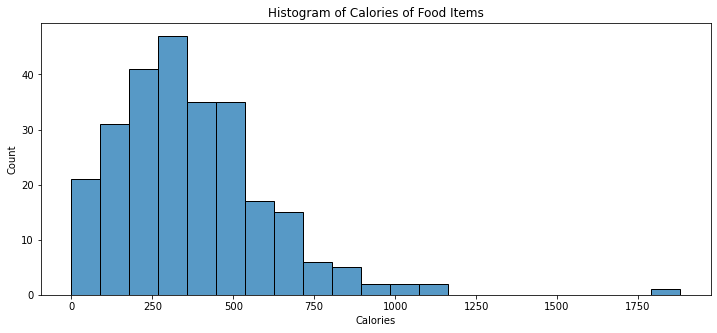

In [24]:
#Plotting a histogram
plt.subplots(figsize=(12, 5))
sns.histplot(x = "Calories", data = data)
plt.title("Histogram of Calories of Food Items")
plt.show()
plt.close()

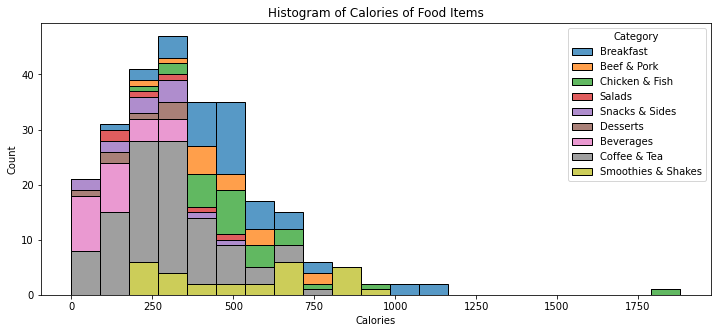

In [25]:
#Plotting a histogram with subcategories
plt.subplots(figsize=(12, 5))
sns.histplot(x = "Calories", hue = "Category", multiple = "stack", data = data)
plt.title("Histogram of Calories of Food Items")
plt.show()
plt.close()

Coffee & Tea


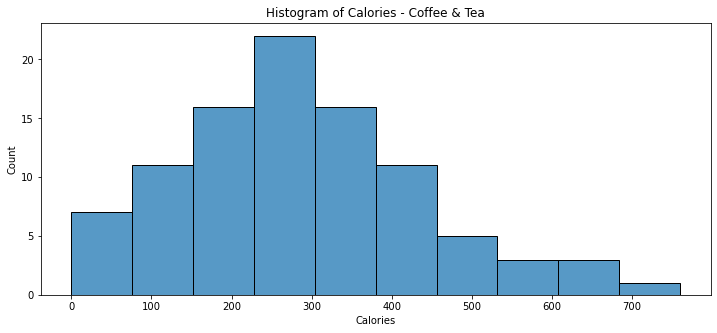

Breakfast


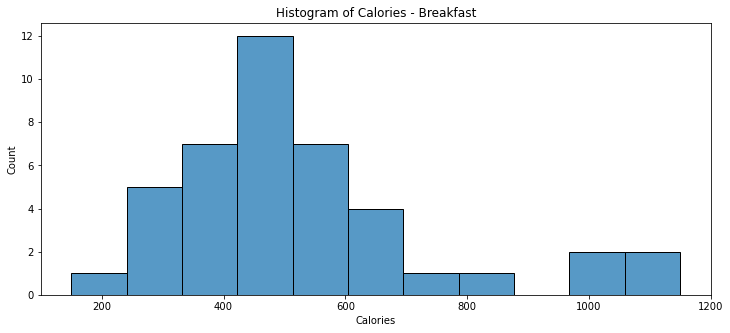

Smoothies & Shakes


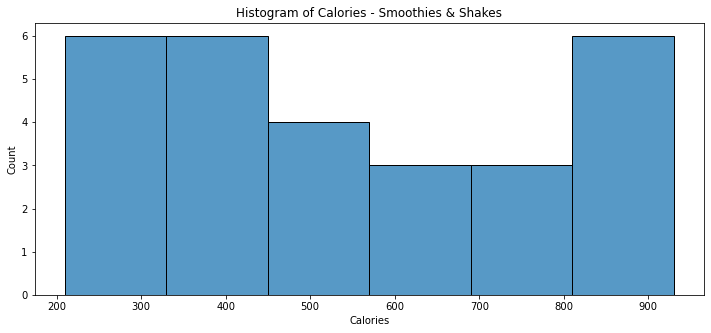

Beverages


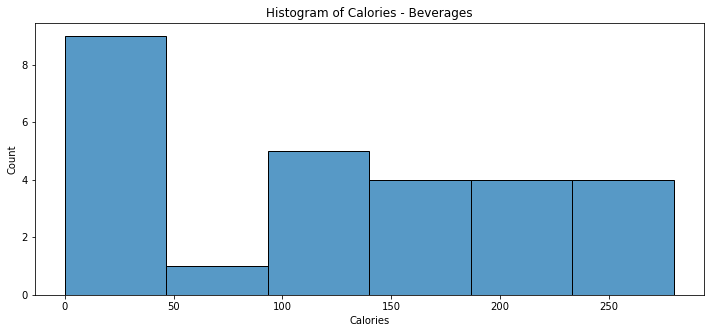

Chicken & Fish


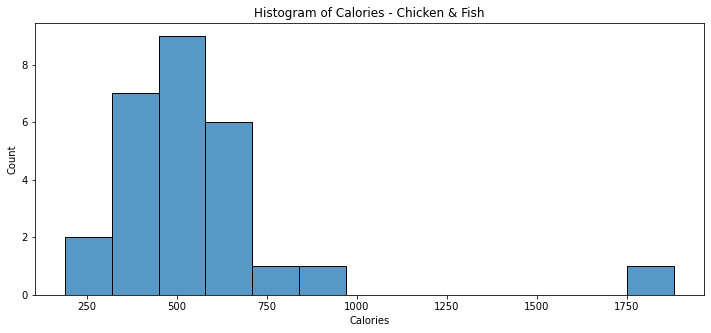

Beef & Pork


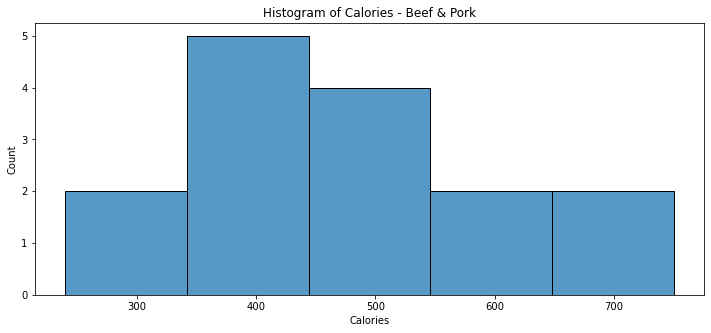

Snacks & Sides


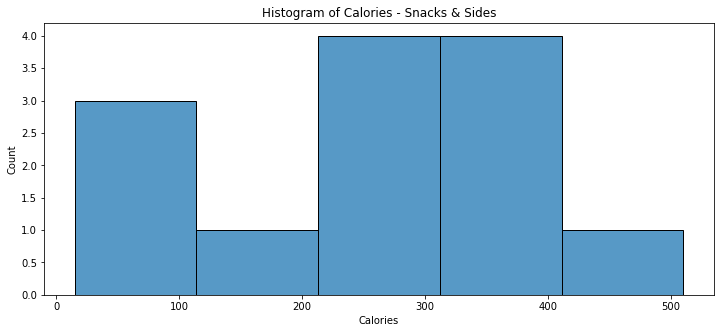

Desserts


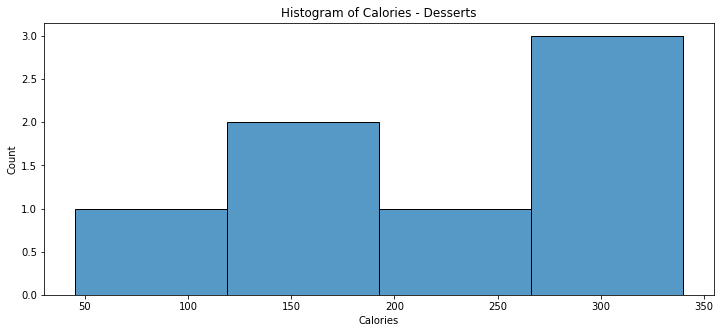

Salads


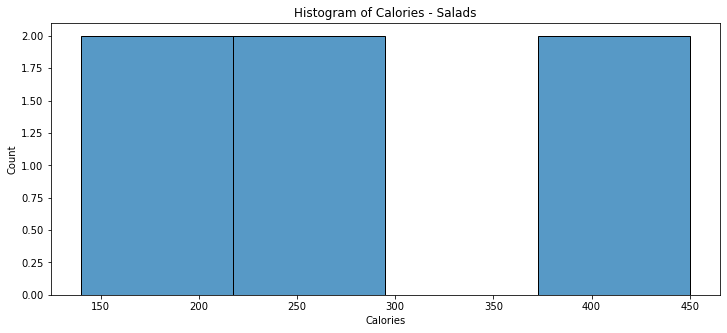

In [26]:
#Plotting a histogram
for category in data["Category"].value_counts().index:
  print(category)
  sub_data = data.loc[data["Category"] == category]
  plt.subplots(figsize=(12, 5))
  sns.histplot(x = "Calories", data = sub_data)
  plt.title("Histogram of Calories - "+category)
  plt.show()
  plt.close()


# Plotting Boxplots

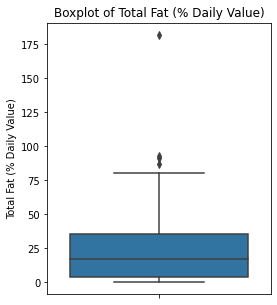

In [27]:
#Plotting a boxplot 
plt.subplots(figsize=(4, 5))
sns.boxplot(y = "Total Fat (% Daily Value)", data = data)
plt.title("Boxplot of Total Fat (% Daily Value)")
plt.show()
plt.close()

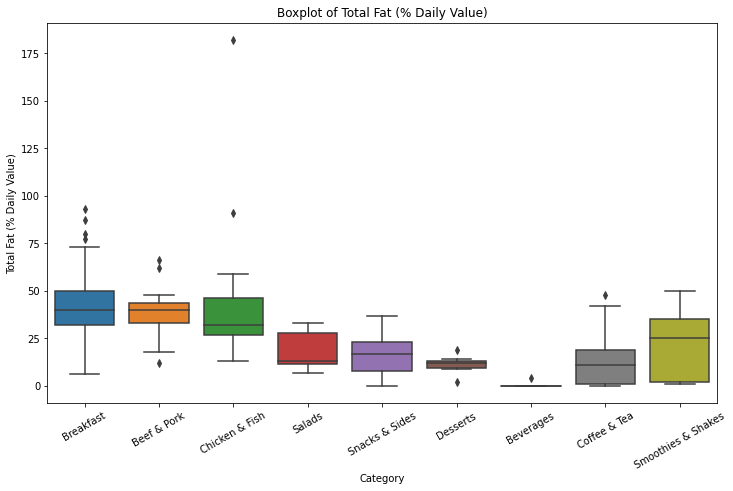

In [28]:
#Plotting a boxplot with subcategories
plt.subplots(figsize=(12, 7))
sns.boxplot(x = "Category", y = "Total Fat (% Daily Value)", data = data)
plt.title("Boxplot of Total Fat (% Daily Value)")
plt.xticks(rotation = 30)
plt.show()
plt.close()

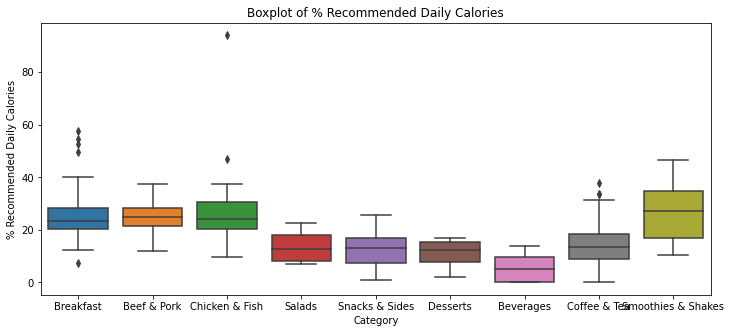

In [29]:
#Plotting a boxplot with subcategories
plt.subplots(figsize=(12, 5))
sns.boxplot(x = "Category", y = "% Recommended Daily Calories", data = data)
plt.title("Boxplot of % Recommended Daily Calories")
plt.show()
plt.close()

# Plotting Line Plots

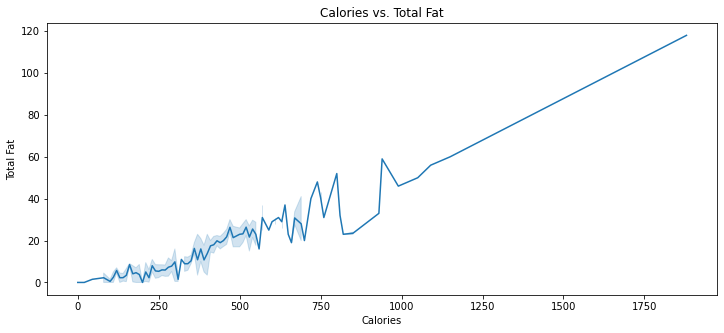

In [30]:
#Plotting line plots
plt.subplots(figsize = (12,5))
sns.lineplot(x = "Calories", y = "Total Fat", data = data)
plt.title("Calories vs. Total Fat")
plt.show()
plt.close()

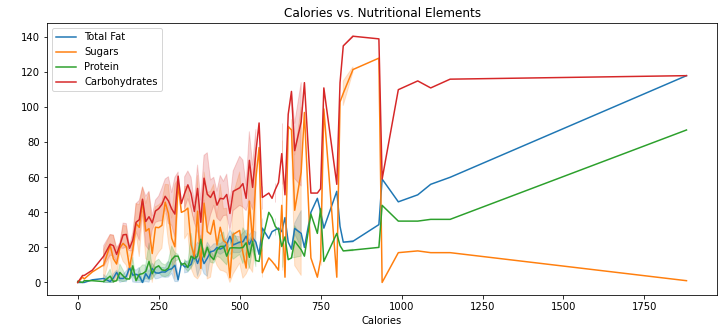

In [31]:
#Plotting multiple line plots
plt.subplots(figsize = (12,5))
#sns.lineplot(x = "Calories", y = "Serving Size", data = data)
sns.lineplot(x = "Calories", y = "Total Fat", label = "Total Fat", data = data)
sns.lineplot(x = "Calories", y = "Sugars", label = "Sugars", data = data)
sns.lineplot(x = "Calories", y = "Protein", label = "Protein", data = data)
sns.lineplot(x = "Calories", y = "Carbohydrates", label = "Carbohydrates", data = data)
plt.title("Calories vs. Nutritional Elements")
plt.ylabel(" ")
plt.legend(loc = "best")
plt.show()
plt.close()

# Plotting Scatter Plots

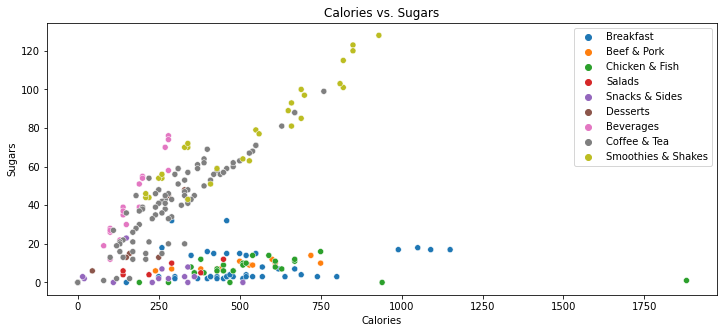

In [32]:
#Plotting a scatter plot with subcategories
plt.subplots(figsize=(12, 5))
sns.scatterplot(x = "Calories", y = "Sugars", hue = "Category", data = data)
plt.title("Calories vs. Sugars")
plt.legend(loc = "upper right")
plt.show()
plt.close()

# Plotting Lines of Best Fit

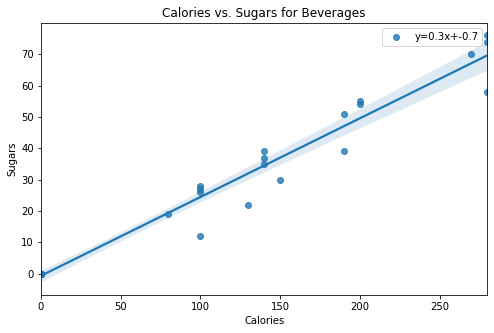

In [33]:
data_beverages = data.loc[data["Category"] == "Beverages"]
#Finding the coefficients of the line of best fit
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(data_beverages['Calories'],data_beverages['Sugars'])

#Plotting a line of best fit
plt.subplots(figsize=(8,5)) 
sns.regplot(x = "Calories", y = "Sugars", data = data_beverages, label = "y={0:.1f}x+{1:.1f}".format(slope,intercept))
plt.title("Calories vs. Sugars for Beverages")
plt.legend()
plt.show()
plt.close()

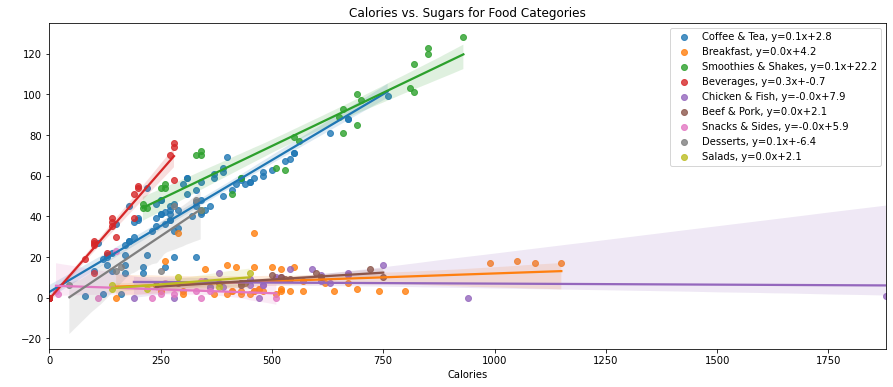

In [34]:
#Plotting multiple lines of best fit
plt.figure(figsize=(15,6))
for category in data["Category"].value_counts().index:
  #Creating a subset of data for every category
  subdata = data.loc[data["Category"] == category]
  #Calculating the coefficients of the lines of best fit
  slope, intercept, r_value, p_value, std_err = sp.stats.linregress(subdata["Calories"], subdata["Sugars"])
  #Plotting the data points and lines of best fit
  sns.regplot(x = "Calories", y = "Sugars", data = subdata, 
                          label = category+", y={0:.1f}x+{1:.1f}".format(slope,intercept))
plt.title("Calories vs. Sugars for Food Categories")
plt.ylabel(" ")
plt.legend()
plt.show()
plt.close()

# Plotting Pairplots

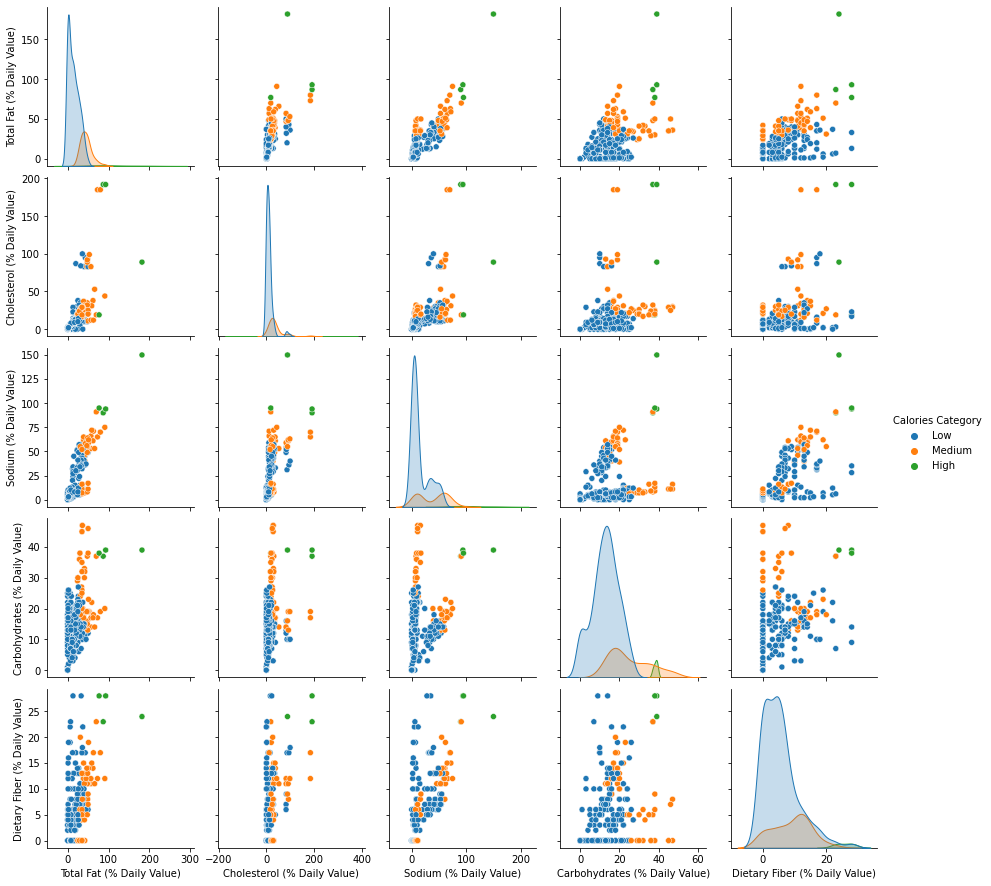

In [35]:
subdata = data[["Calories Category", "Total Fat (% Daily Value)", "Cholesterol (% Daily Value)", 
                "Sodium (% Daily Value)", "Carbohydrates (% Daily Value)", "Dietary Fiber (% Daily Value)"]]
sns.pairplot(subdata, hue = "Calories Category")